In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


EDA

In [251]:
# Check for missing values
df.isnull().sum().sum()

0

In [252]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [253]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [219]:
# df = df.drop_duplicates()

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [255]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [256]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

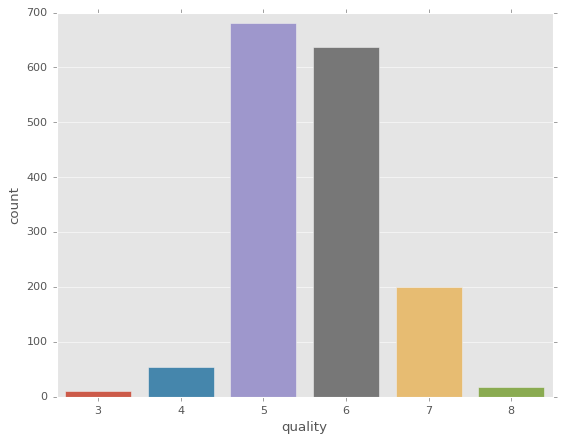

In [257]:

style.use('ggplot')
sns.countplot(df['quality'])



Quality with grade 5 is present the max amount and grade 3 is the min amount present in the dataset.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

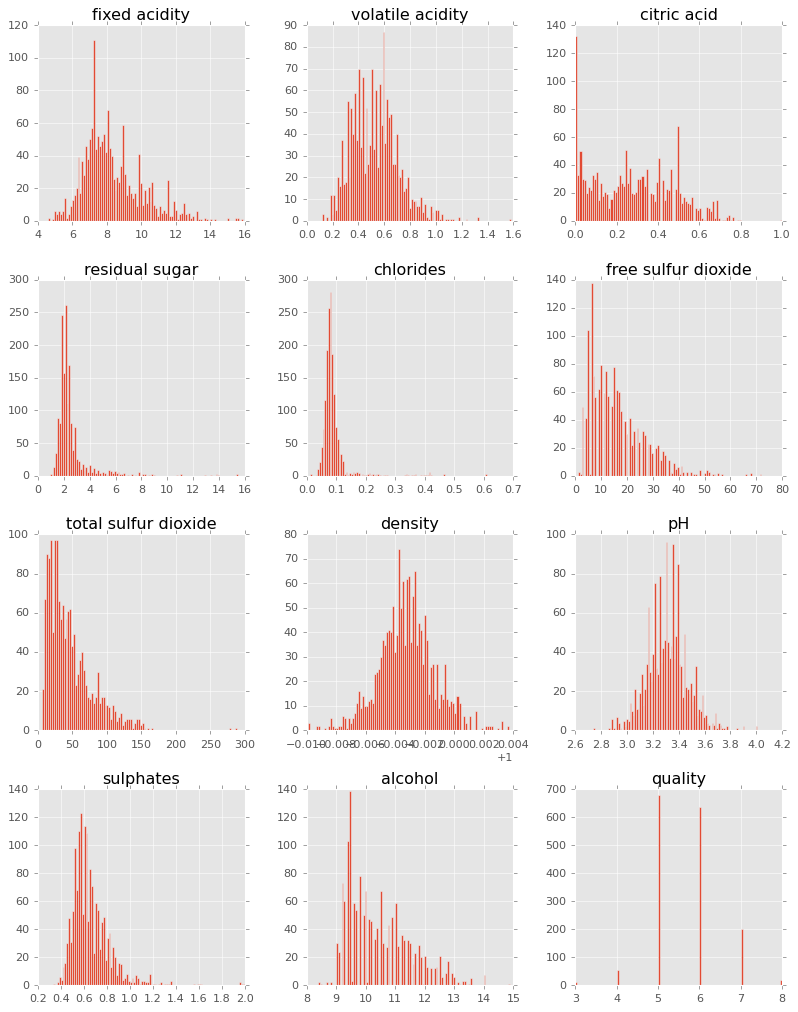

In [258]:
df.hist(bins= 100, figsize=(12,15))

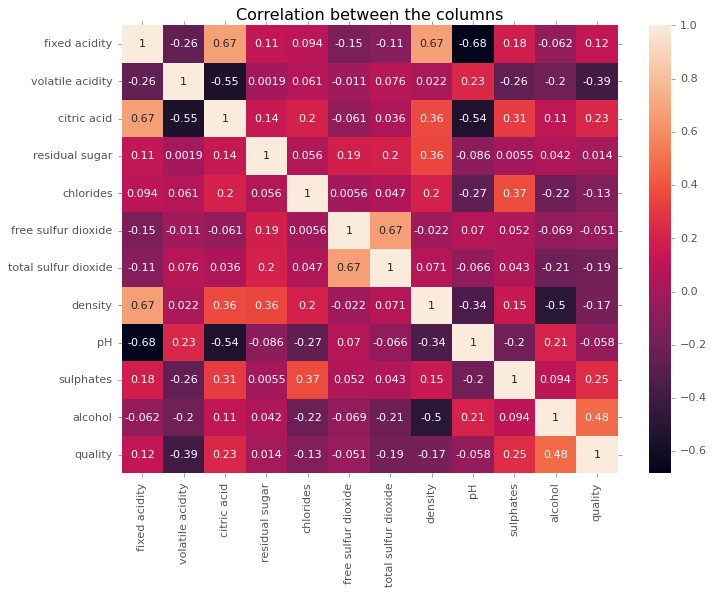

In [259]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

Qality has a very good relationship with alcohol, Volatile acidity, chlorides, free sulfate dioxide, pH has negative outcomes which point out at the weak bonding with quality.

In [260]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

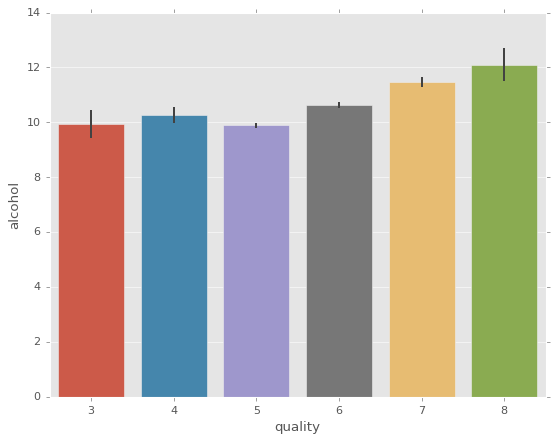

In [261]:
sns.barplot(df['quality'], df['alcohol'])

As we can see grade 8 had the highest alcohol content

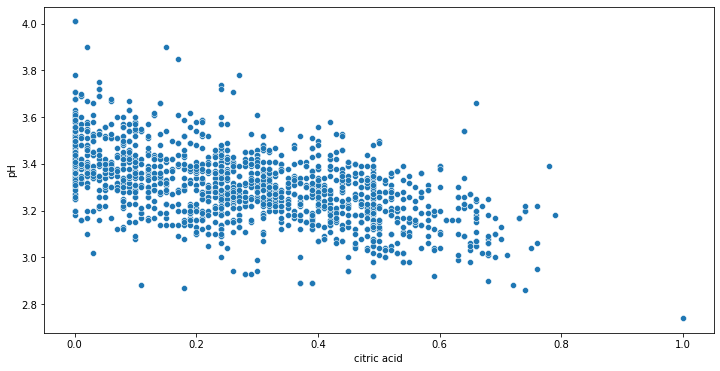

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='citric acid', y = 'pH', data= df)
plt.show()

pH descreasing when citric acid increases and viceversa, in the plot we can see citric acid at at 1.0 at the highest point, and the pH is at lowest point at 2.5.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x432 with 0 Axes>

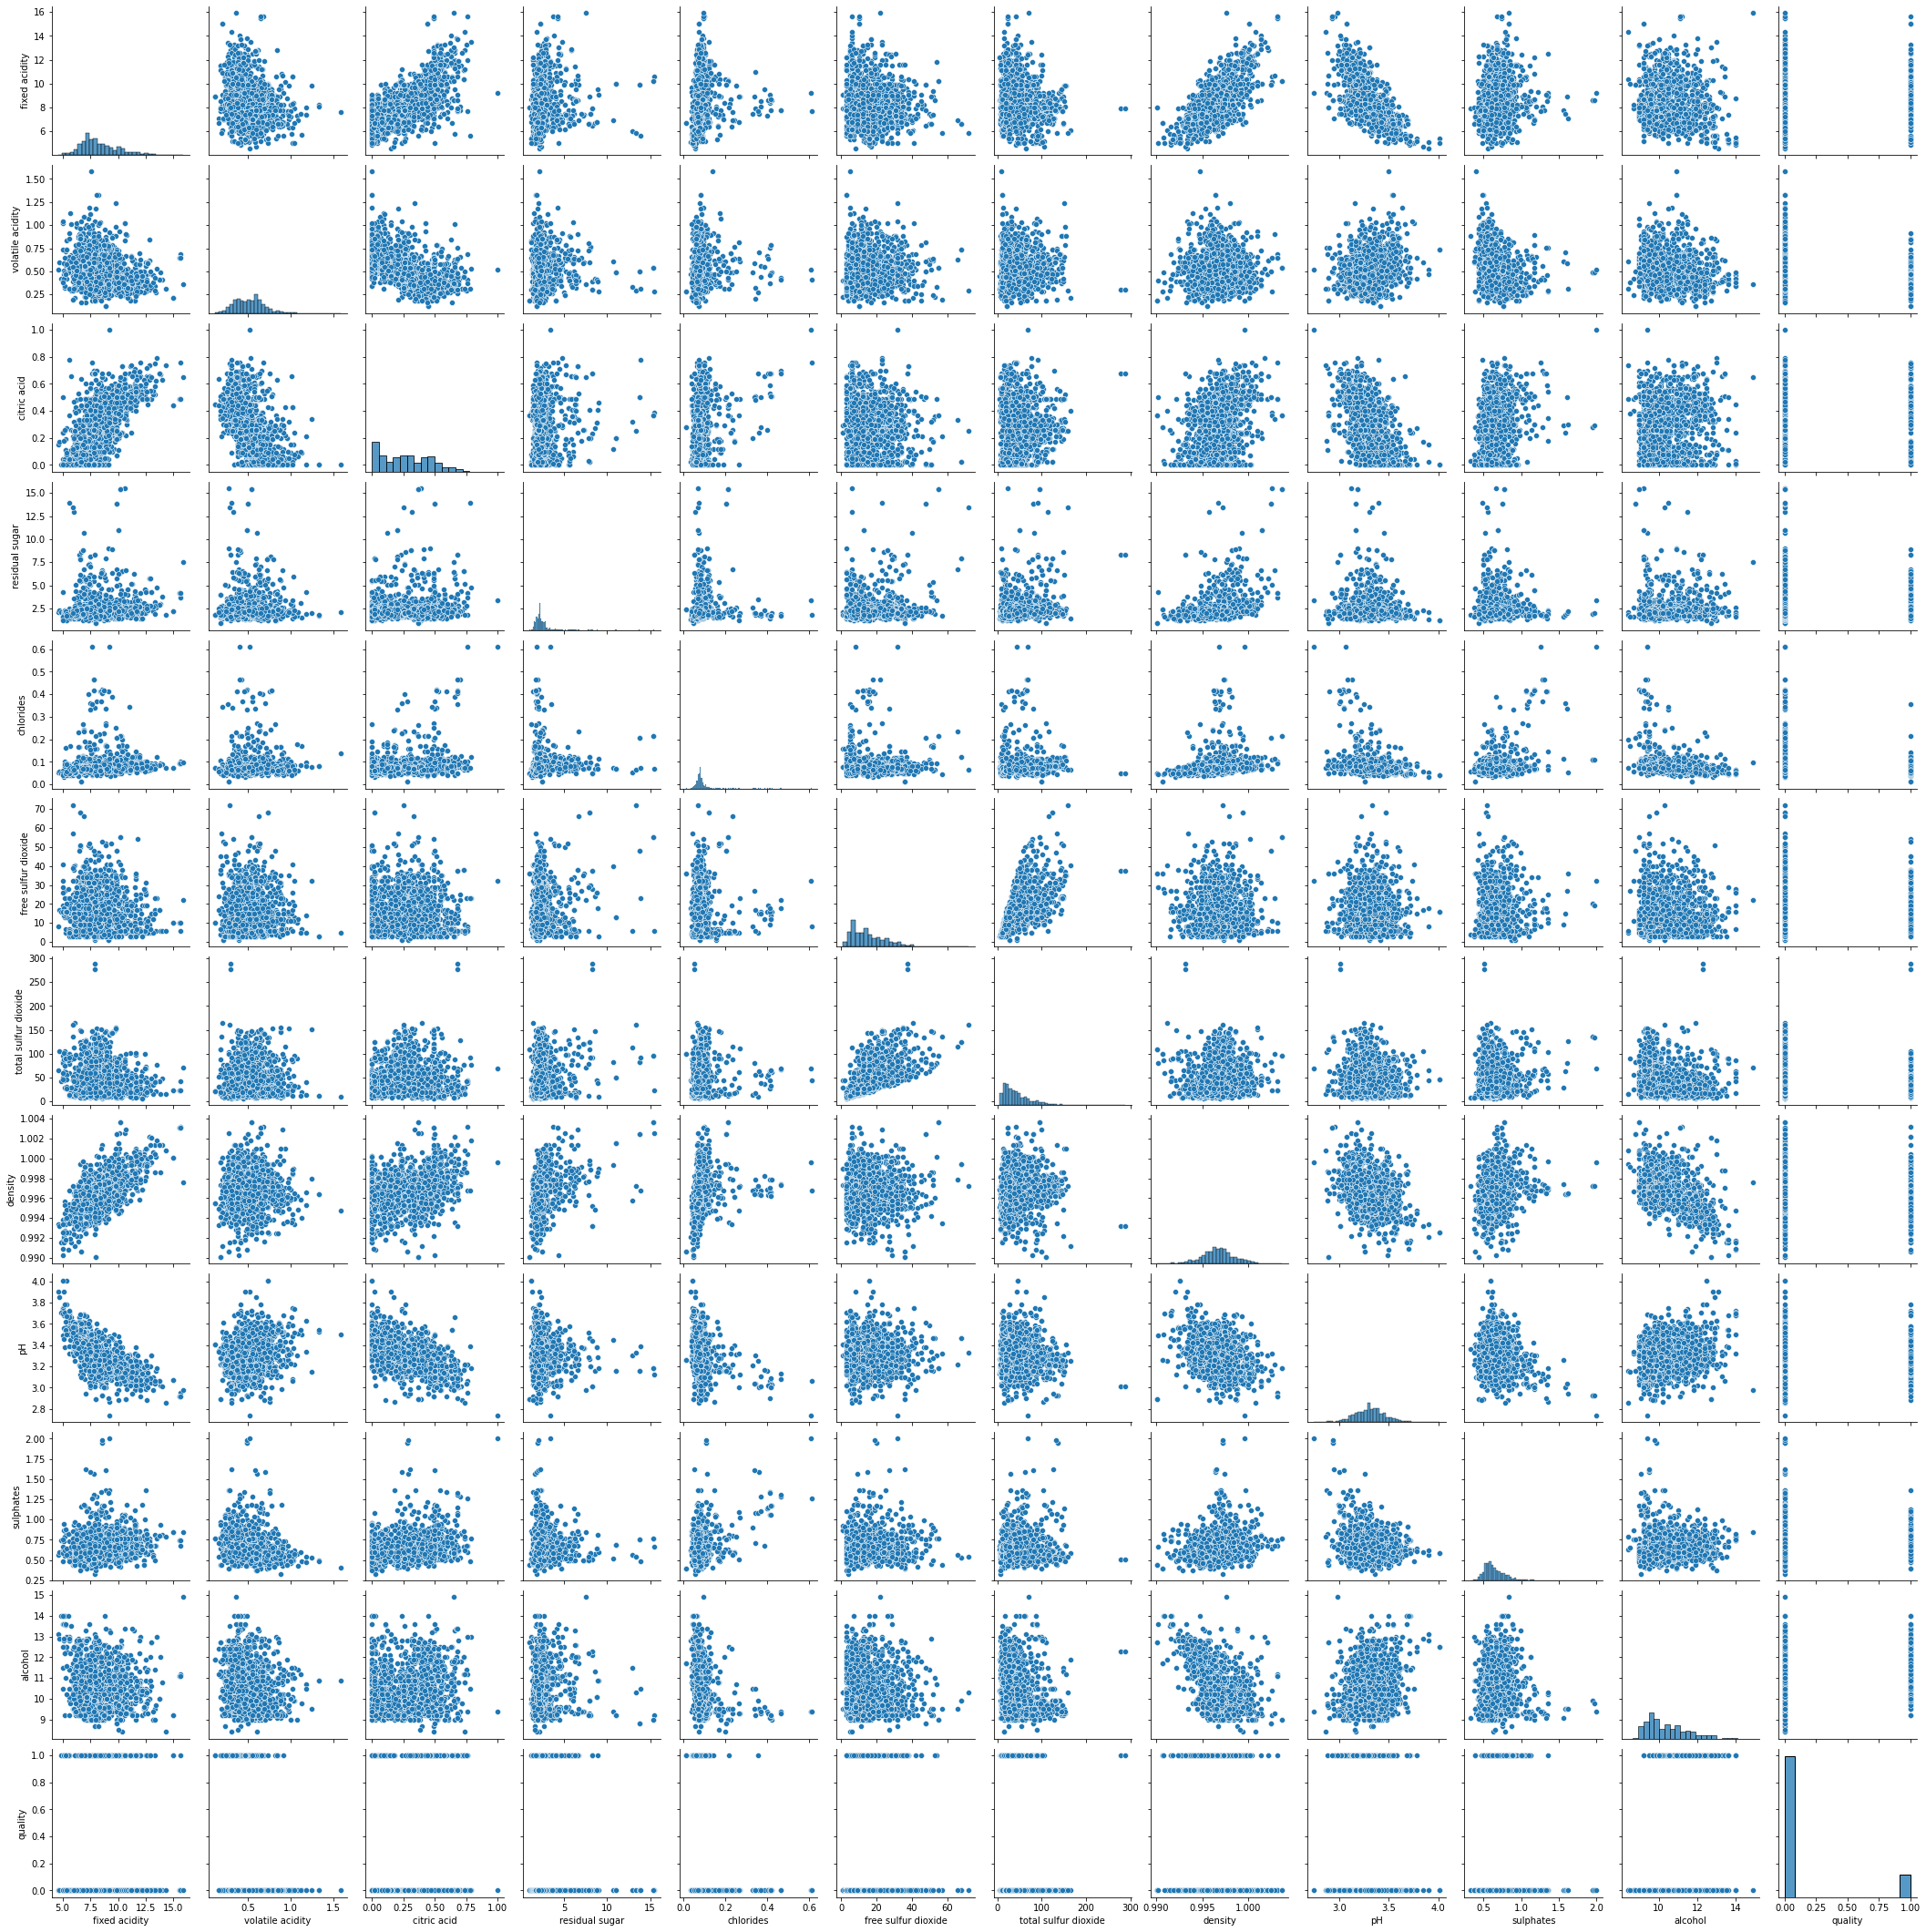

In [10]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.show

As we can see grade 5 quality has the highest 

Data processing

In [8]:
df['quality'] = df.quality.apply(lambda x:1 if x >= 7 else 0)

In [263]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [12]:
X = df.drop('quality', axis=1)
y = df['quality']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [14]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


In [19]:
# from sklearn.preprocessing import StandardScaler

# stdscale = StandardScaler().fit(X_train)
# X_train_std = stdscale.transform(X_train)
# X_test_std = stdscale.transform(X_test)

In [18]:
# print("X_train ", X_train.shape)
# print("y_train ", y_train.shape)
# print("X_test ", X_test.shape)
# print("y_test ", y_test.shape)

Model Training

Logistic regression model

In [267]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy is: {:.2f}%".format(logreg_acc*100))

Test Accuracy is: 86.88%


In [268]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



TN:  403
FN:  53
TP:  14
FN:  10


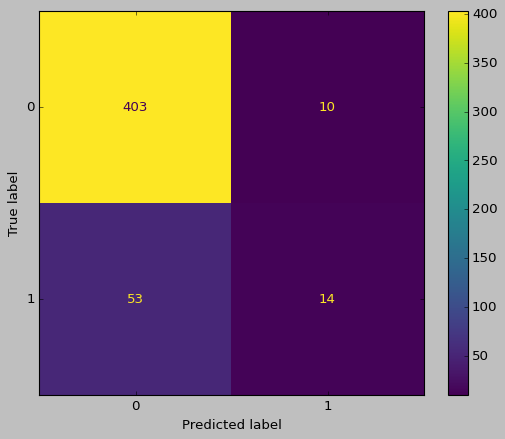

In [270]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels =logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])



Decision Tree

In [271]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc =accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 86.67%


In [272]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.52      0.64      0.57        67

    accuracy                           0.87       480
   macro avg       0.73      0.77      0.75       480
weighted avg       0.88      0.87      0.87       480



TN:  373
FN:  24
TP:  43
FN:  40


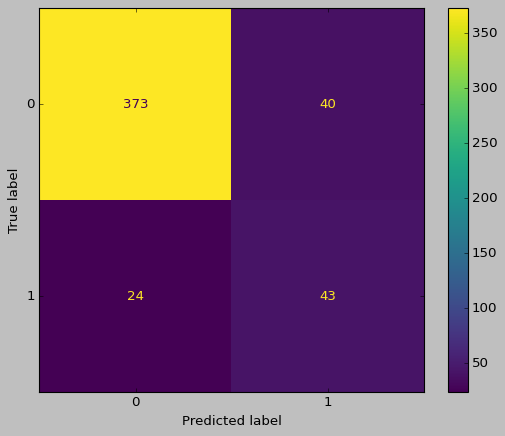

In [273]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels =dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

Random Forest

In [274]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test Accuracy: {:.2f}".format(rforest_acc*100))

Test Accuracy: 88.75


In [275]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.62      0.49      0.55        67

    accuracy                           0.89       480
   macro avg       0.77      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480



TN:  393
FN:  34
TP:  33
FN:  20


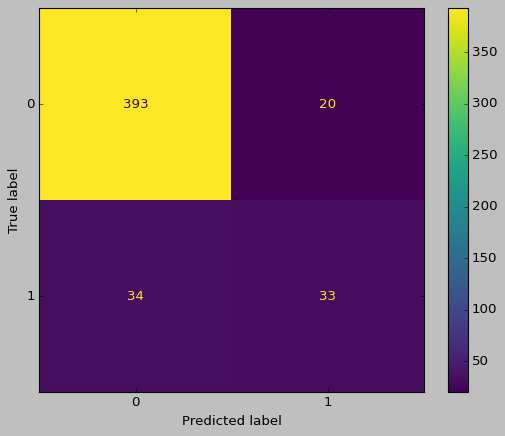

In [276]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels =rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

Linear Descrimination Analysis

In [277]:
danalysis = LinearDiscriminantAnalysis()
danalysis.fit(X_train, y_train)
danalysis_pred = danalysis.predict(X_test)
danalysis_acc =accuracy_score(danalysis_pred, y_test)
print("Test accuracy: {:.2f}%".format(danalysis_acc*100))

Test accuracy: 85.21%


In [278]:
print(classification_report(y_test, danalysis_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       413
           1       0.46      0.37      0.41        67

    accuracy                           0.85       480
   macro avg       0.68      0.65      0.66       480
weighted avg       0.84      0.85      0.85       480



TN:  384
FN:  42
TP:  25
FN:  29


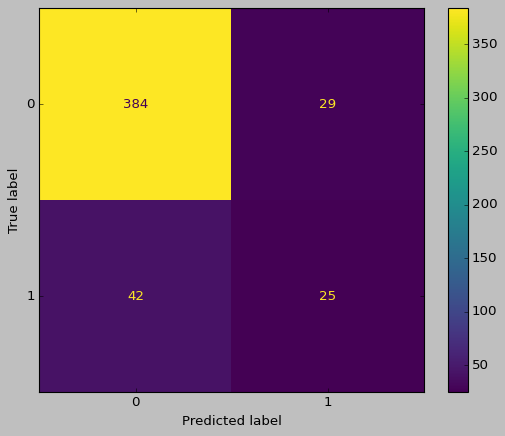

In [279]:
style.use('classic')
cm = confusion_matrix(y_test, danalysis_pred, labels =danalysis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = danalysis.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

K-Nearest Neighbors

In [280]:
kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train, y_train)
kneighbors_pred = kneighbors.predict(X_test)
kneighbors_acc =accuracy_score(kneighbors_pred, y_test)
print("Test accuracy: {:.2f}%".format(kneighbors_acc*100))

Test accuracy: 85.83%


In [281]:
print(classification_report(y_test, kneighbors_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       413
           1       0.48      0.19      0.28        67

    accuracy                           0.86       480
   macro avg       0.68      0.58      0.60       480
weighted avg       0.83      0.86      0.83       480



TN:  399
FN:  54
TP:  13
FN:  14


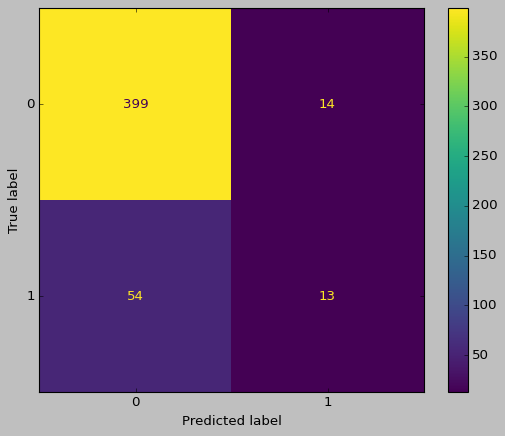

In [282]:
style.use('classic')
cm = confusion_matrix(y_test, kneighbors_pred, labels =kneighbors.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = kneighbors.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FN: ", cm[0][1])

We can see out of all models, Random Forest Method has the highest accuracy.

Building predictive system

In [288]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

# Change the input data to numpy array

input_data_as_numpy_array = np.array(input_data)

# reshape data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rforest.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
    print('Good quality wine')
else:
    print('Bad quality wine')

[1]
Good quality wine
